# Training CNN Model on STL-10 dataset

## 1.) Creating a CNN model from scratch

In [11]:
# Lodaing all the required libraries

from read_stl import *
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
# Loadin the testing and training dataset from my local directory
x=read_all_images("/home/alankrit/Desktop/stl10_binary/train_X.bin")
y=read_labels("/home/alankrit/Desktop/stl10_binary/train_y.bin")
test_x=read_all_images("/home/alankrit/Desktop/stl10_binary/test_X.bin")
test_y=read_labels("/home/alankrit/Desktop/stl10_binary/test_y.bin")

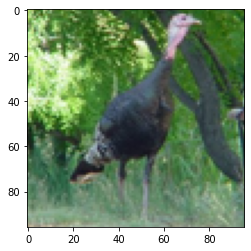

In [4]:
# Testing one image
plot_image(x[2]) 

In [5]:
# All the class labels

labels=["airplanes","bird","car","cat","deer","dog","horse","monkey","ship","truck"]

In [6]:
# Splitting data into training and validation set
train_x,val_x,train_y,val_y=train_test_split(x,y,train_size=0.8,random_state=0)

In [7]:
#Creating CNN model using the Functional API

def my_model():
    inputs=layers.Input(shape=(96,96,3))
    x=layers.Conv2D(32,(3,3),padding='same',kernel_regularizer=tf.keras.regularizers.l1_l2(0.001))(inputs)
    x=layers.BatchNormalization()(x)
    x=tf.keras.activations.relu(x)
    x=layers.MaxPooling2D((3,3),padding='same')(x)
    x=layers.Conv2D(64,(3,3),padding='same',kernel_regularizer=tf.keras.regularizers.l1_l2(0.001))(x)
    x=layers.BatchNormalization()(x)
    x=tf.keras.activations.relu(x)
    x=layers.Conv2D(64,(3,3),padding='same',kernel_regularizer=tf.keras.regularizers.l1_l2(0.001))(x)
    x=layers.BatchNormalization()(x)
    x=tf.keras.activations.relu(x)
    x=layers.MaxPooling2D((2,2),padding='same')(x)
    x=layers.Conv2D(128,(3,3),padding='same',kernel_regularizer=tf.keras.regularizers.l1_l2(0.001))(x)
    x=layers.BatchNormalization()(x)
    x=tf.keras.activations.relu(x)
    x=layers.MaxPooling2D((2,2),padding='same')(x)
    x=layers.Conv2D(256,(3,3),padding='valid',kernel_regularizer=tf.keras.regularizers.l1_l2(0.001))(x)
    x=layers.Dropout(0.4)(x)
    x=tf.keras.activations.relu(x)
    x=layers.MaxPooling2D((2,2),padding='valid')(x)
    
  
    x=layers.Flatten()(x)
 
    x=layers.Dense(200,activation='relu')(x)
    outputs=layers.Dense(10,activation='softmax')(x)
    model=tf.keras.Model(inputs=inputs,outputs=outputs)
    return model
mod=my_model()

In [8]:
mod.summary() #Overview of the created model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 32)        128       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256   

In [9]:
# Compiling model using Sparse Categorical Crossentropy as loss function and Adam optimizer

mod.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [10]:
# Training model on training data
hist=mod.fit(train_x,(train_y-1),batch_size=32,epochs=40,validation_data=(val_x,val_y-1))

Epoch 1/40
125/125 [==============================] - 39s 305ms/step - loss: 14.8383 - accuracy: 0.2399 - val_loss: 7.0991 - val_accuracy: 0.3680
Epoch 2/40
125/125 [==============================] - 46s 368ms/step - loss: 5.5618 - accuracy: 0.4283 - val_loss: 4.0597 - val_accuracy: 0.1250
Epoch 3/40
125/125 [==============================] - 44s 350ms/step - loss: 2.9577 - accuracy: 0.4529 - val_loss: 2.6892 - val_accuracy: 0.4150
Epoch 4/40
125/125 [==============================] - 40s 317ms/step - loss: 2.4265 - accuracy: 0.4756 - val_loss: 2.4809 - val_accuracy: 0.4070
Epoch 5/40
125/125 [==============================] - 37s 296ms/step - loss: 2.1985 - accuracy: 0.4952 - val_loss: 2.3890 - val_accuracy: 0.3660
Epoch 6/40
125/125 [==============================] - 37s 295ms/step - loss: 2.0718 - accuracy: 0.4968 - val_loss: 2.2763 - val_accuracy: 0.3890
Epoch 7/40
125/125 [==============================] - 37s 295ms/step - loss: 1.9997 - accuracy: 0.4973 - val_loss: 2.1401 - val_a

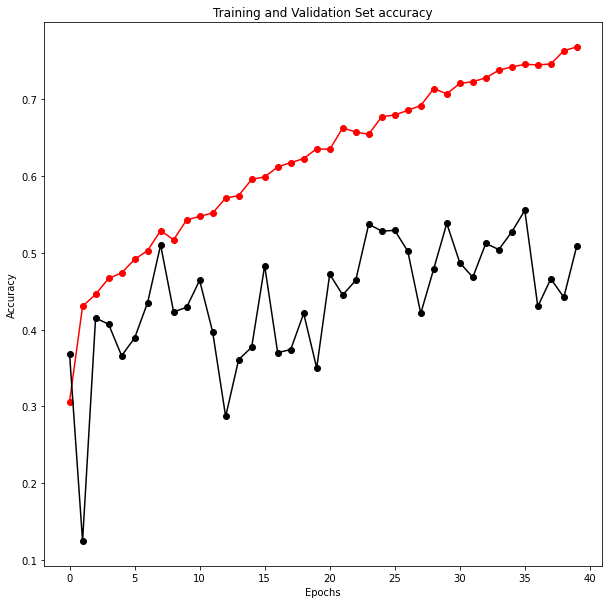

In [11]:
# Plotting accuracy vs epochs for training(red) and validation(black) set
plt.figure(figsize=(10,10))
plt.plot(list(hist.history['accuracy']),'r-o')
plt.plot(list(hist.history['val_accuracy']),'k-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Set accuracy")
plt.show()

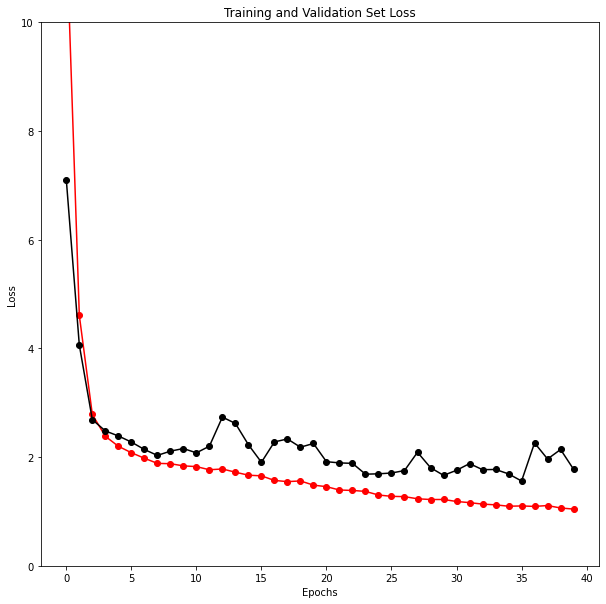

In [12]:
# Plotting loss vs epochs for training(red) and validation(black) set
plt.figure(figsize=(10,10))
plt.plot(list(hist.history['loss']),'r-o')
plt.plot(list(hist.history['val_loss']),'k-o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Set Loss")

plt.ylim((0,10))
plt.show()

## 2.) Transfer learning on the VGG19 model

In [14]:
# Loading the pretrained vgg19 model with the desired input shape
model=tf.keras.applications.VGG19(include_top=False,input_shape=(96,96,3))

80142336/80134624 [==============================] - 118s 1us/step


In [15]:
#Freezin the layers of the pretrained model
model.trainable=False

In [16]:
model.summary()#Printing an overview of the model

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [17]:
# Adding a 10 unit layer on top of the existing model

base_inputs=model.layers[0].input
base_outputs=model.layers[-1].output
x=layers.Flatten()(base_outputs)

x=layers.Dense(1000,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2())(x)
x=layers.Dense(10,activation='softmax')(x)
new=tf.keras.Model(inputs=base_inputs,outputs=x)
new.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0   

In [18]:
#compilin the final model . Note that the 20,024,384 parameters are pretrained and will not be trained 
# and only the 4,619,010 added on top of the existing model will be trained
new.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [20]:
# fitting the new model
history= new.fit(train_x,(train_y-1),batch_size=32,epochs=40,validation_data=(val_x,val_y-1))

Epoch 1/40
125/125 [==============================] - 189s 2s/step - loss: 484.7891 - accuracy: 0.6182 - val_loss: 70.7487 - val_accuracy: 0.7610
Epoch 2/40
125/125 [==============================] - 195s 2s/step - loss: 50.9446 - accuracy: 0.8132 - val_loss: 37.8095 - val_accuracy: 0.7230
Epoch 3/40
125/125 [==============================] - 196s 2s/step - loss: 34.8849 - accuracy: 0.7523 - val_loss: 34.9979 - val_accuracy: 0.7130
Epoch 4/40
125/125 [==============================] - 195s 2s/step - loss: 31.4861 - accuracy: 0.7522 - val_loss: 28.8422 - val_accuracy: 0.7110
Epoch 5/40
125/125 [==============================] - 196s 2s/step - loss: 27.7328 - accuracy: 0.7562 - val_loss: 24.6070 - val_accuracy: 0.6920
Epoch 6/40
125/125 [==============================] - 196s 2s/step - loss: 22.7357 - accuracy: 0.7879 - val_loss: 19.2962 - val_accuracy: 0.7180
Epoch 7/40
125/125 [==============================] - 196s 2s/step - loss: 19.5242 - accuracy: 0.7733 - val_loss: 18.9290 - val_a

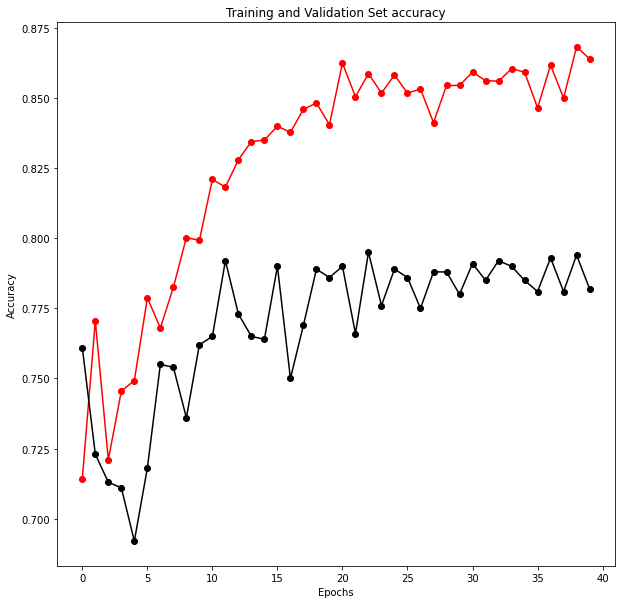

In [21]:
# Plotting accuracy vs epochs for training(red) and validation(black) set
plt.figure(figsize=(10,10))
plt.plot(list(history.history['accuracy']),'r-o')
plt.plot(list(history.history['val_accuracy']),'k-o')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Set accuracy")
plt.show()

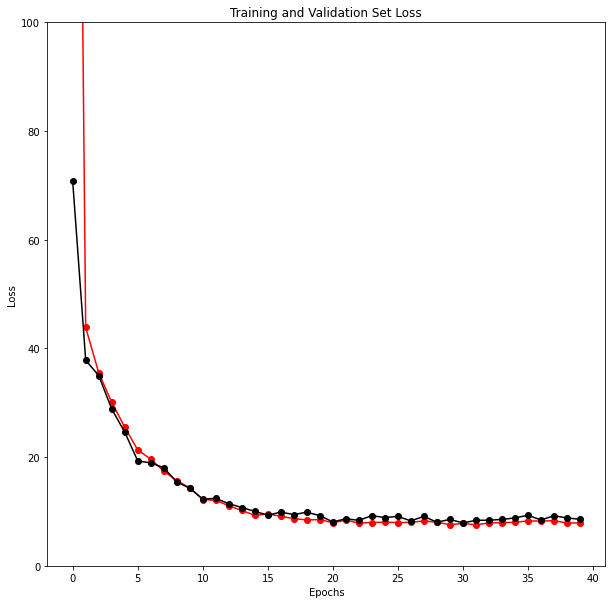

In [22]:
# Plotting loss vs epochs for training(red) and validation(black) set
plt.figure(figsize=(10,10))
plt.plot(list(history.history['loss']),'r-o')
plt.plot(list(history.history['val_loss']),'k-o')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Set Loss")

plt.ylim((0,100))
plt.show()

In [25]:
# saving both the models on local folder
mod.save('my_model/')
new.save('transfer/')

INFO:tensorflow:Assets written to: my_model/assets
INFO:tensorflow:Assets written to: transfer/assets


In [9]:
# Loading the saved models
mod= tf.keras.models.load_model('my_model/')
new=tf.keras.models.load_model('transfer/')

In [6]:
# Evaluating the first model on training data 
mod.evaluate(test_x,test_y-1)

250/250 [==============================] - 14s 54ms/step - loss: 1.8068 - accuracy: 0.4999


[1.8067961931228638, 0.499875009059906]

In [10]:
# Evaluating the second model on training data 
hist2=new.evaluate(test_x,test_y-1) 

250/250 [==============================] - 311s 1s/step - loss: 8.5699 - accuracy: 0.7840


The model built from scratch had an accuracy of about 75 % on training set, 50 % on validation set and 49.99% on testing set. The model built on top of the pretrained VGG19 model has an accuracy of about 86.5 % on training set, 79 % on validation set and 78.40 % on test set